In [35]:
import polars as pl
from polars import DataFrame
from pathlib import Path

COLLECTED_DATA = Path("data/collected-gemini-2.5-pro-N100-JtYFhBSk.csv")

In [36]:
df = pl.read_csv(COLLECTED_DATA)
assert isinstance(df, DataFrame)

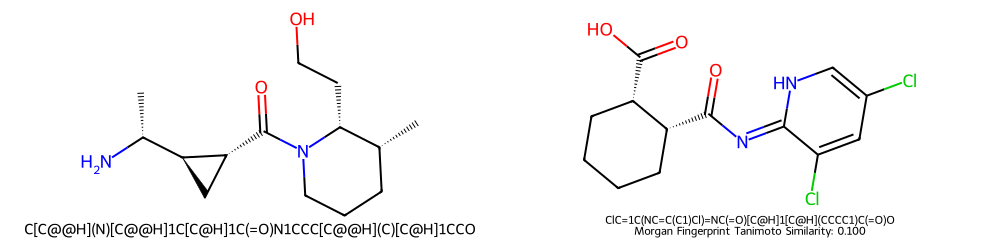

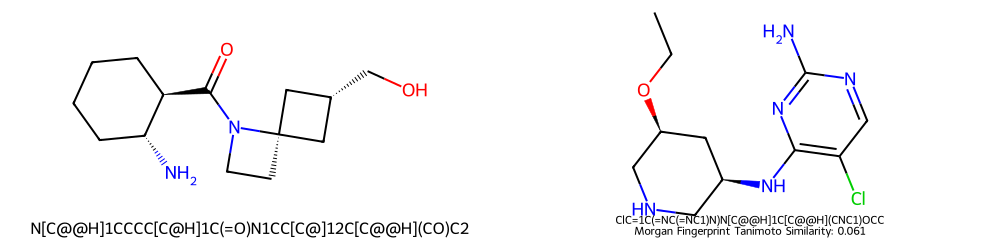

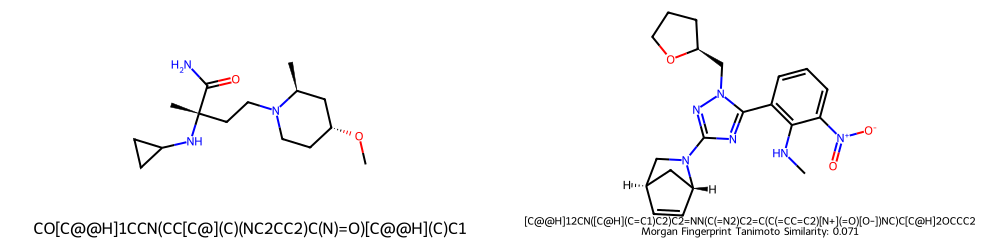

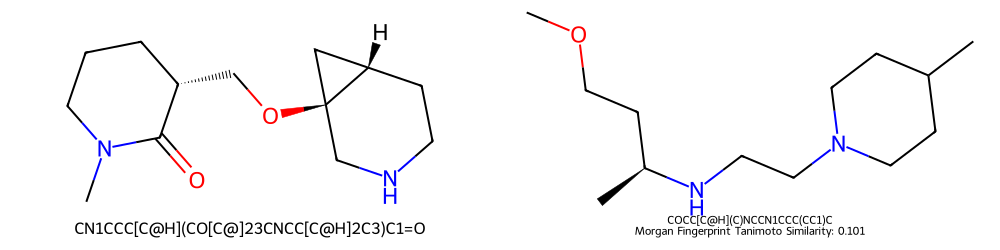

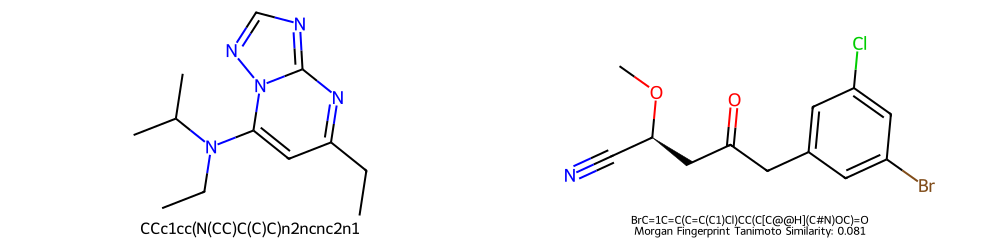

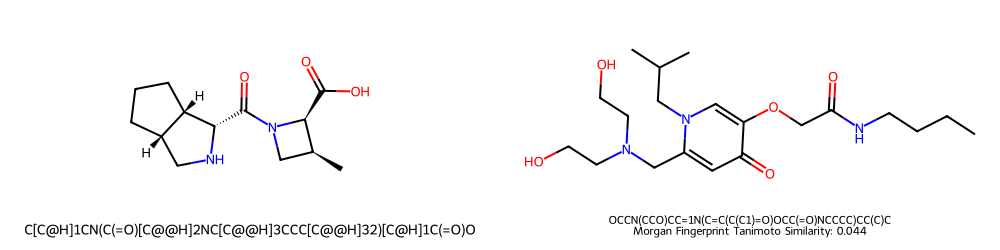

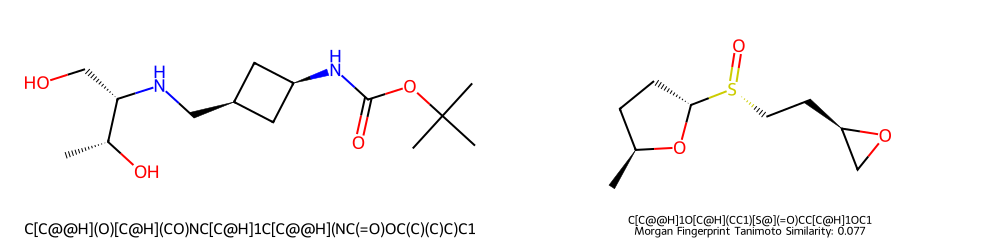

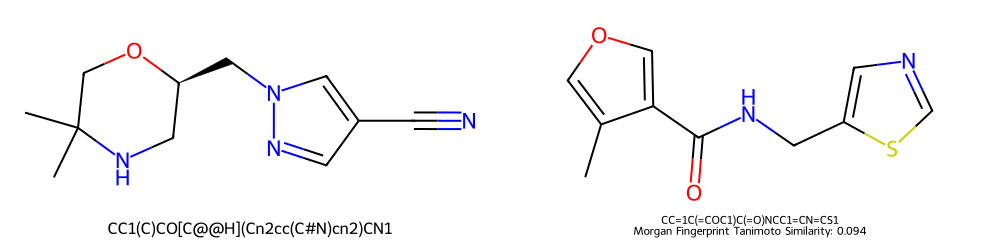

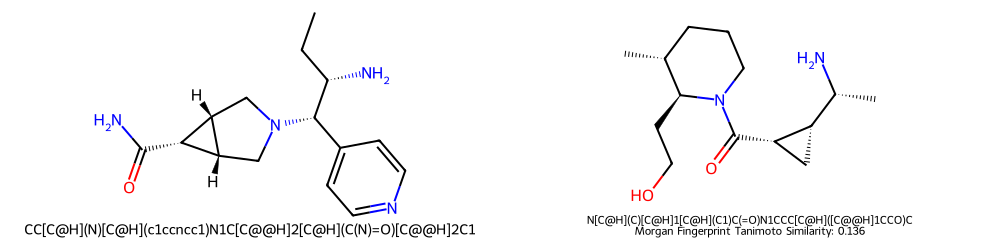

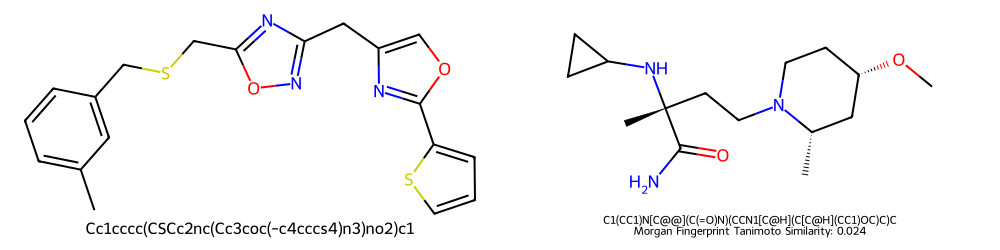

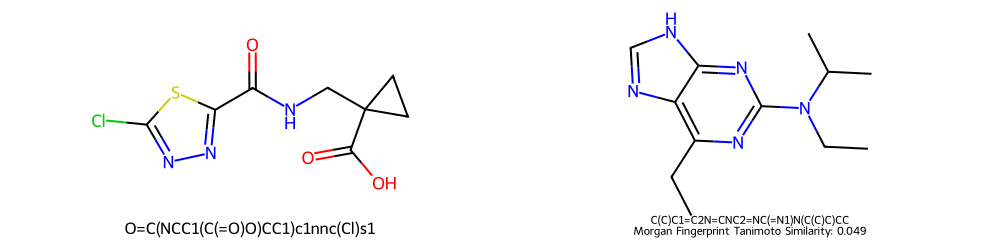

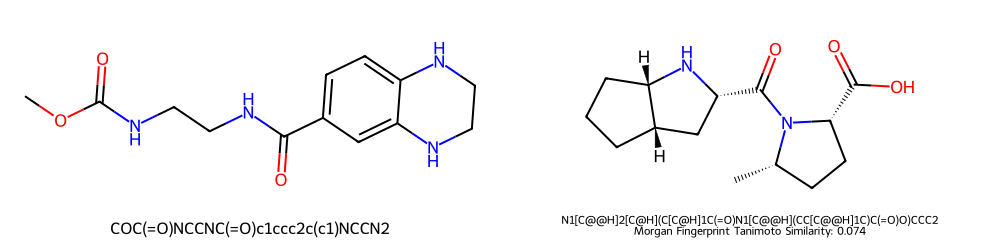

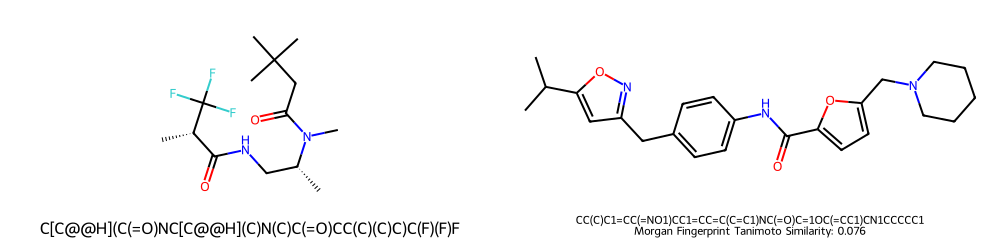

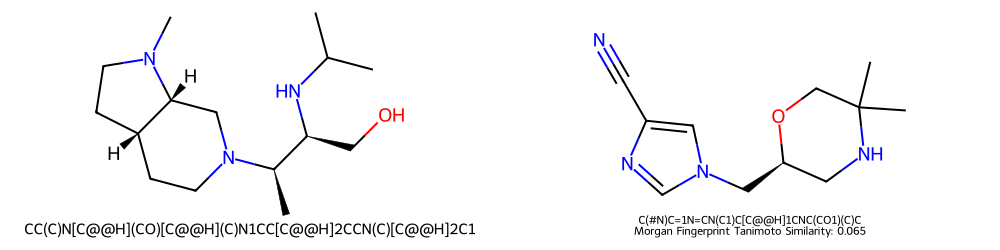

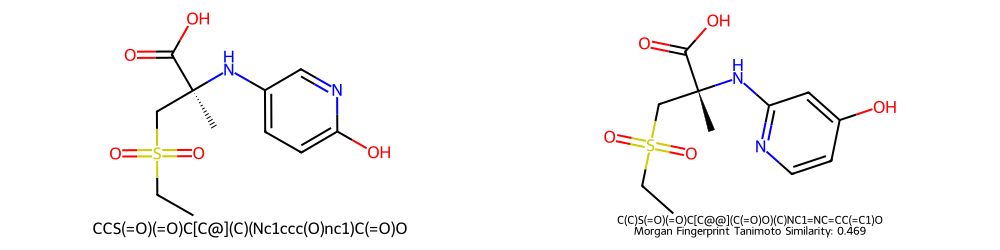

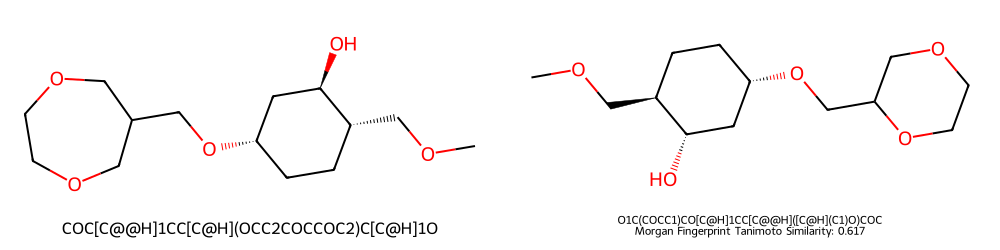

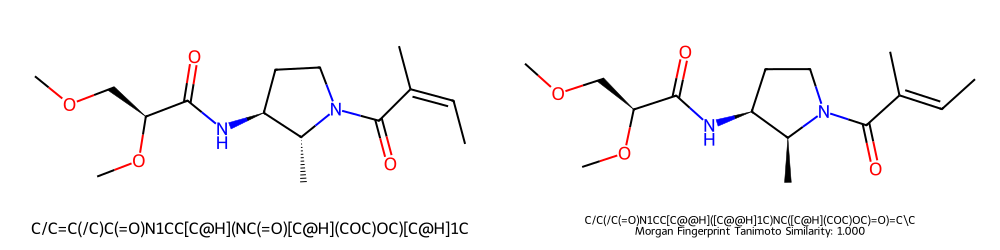

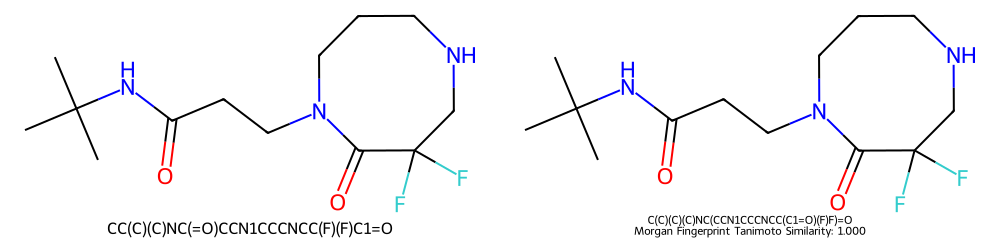

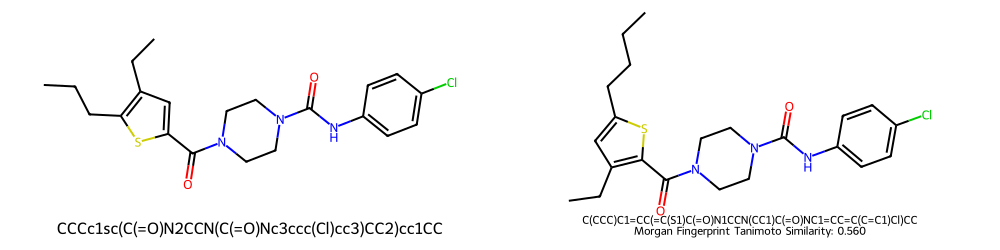

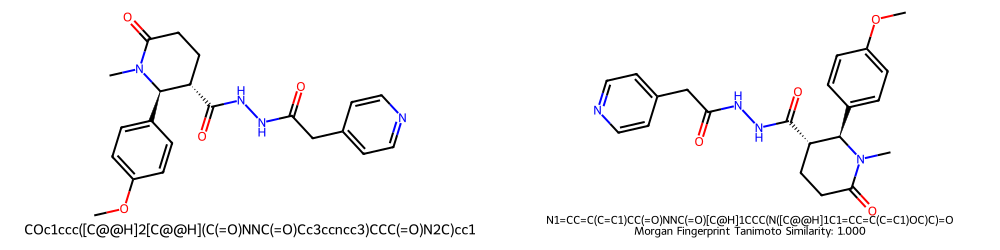

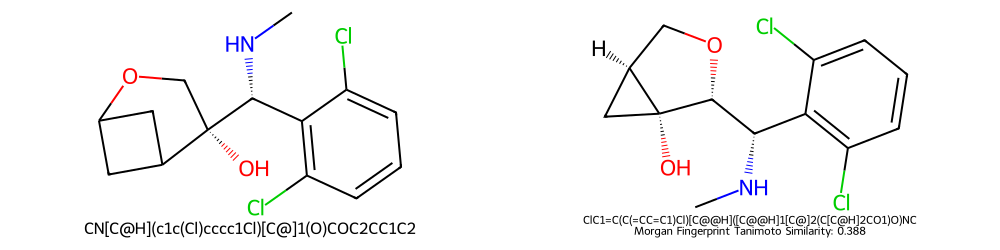

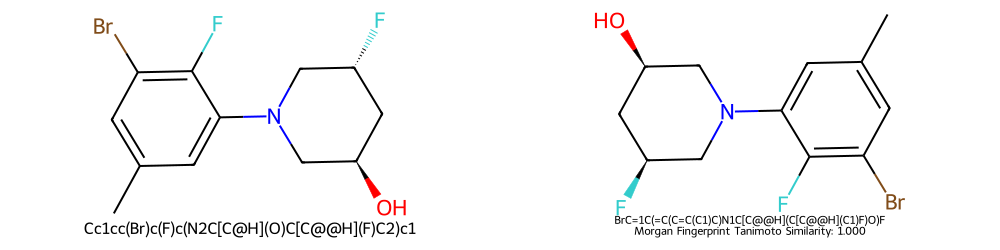

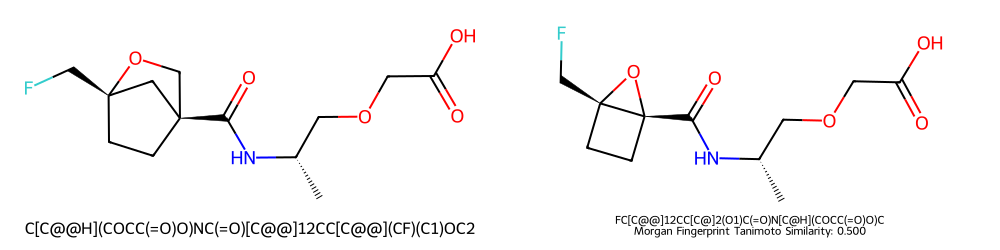

In [37]:
# validate smiles
from IPython.display import display
from rdkit import Chem, DataStructs
from rdkit.Chem import Draw
from rdkit.Chem import rdFingerprintGenerator

fpgen= rdFingerprintGenerator.GetMorganGenerator()

tanimoto_similarity: list[int | float | None] = []
for mol in df.rows():
    original_smiles, iupac, opsin_smiles, errors = mol
    if errors:
        tanimoto_similarity.append(None)
        continue
    original_mol = Chem.MolFromSmiles(original_smiles)
    opsin_mol = Chem.MolFromSmiles(opsin_smiles)
    original_fp = fpgen.GetFingerprint(original_mol)
    opsin_fp = fpgen.GetFingerprint(opsin_mol)
    sim = DataStructs.TanimotoSimilarity(original_fp, opsin_fp)
    tanimoto_similarity.append(sim)
    display(
        Draw.MolsToGridImage(
            mols=[original_mol, opsin_mol], 
            legends=[original_smiles, opsin_smiles + f"\nMorgan Fingerprint Tanimoto Similarity: {sim:.3f}"],
            molsPerRow=2,
            subImgSize=(500, 250),
        )
    )